## Basic scripting with Python

__Create or find small dataset of images, using an online data source such as Kaggle. At the very least, your dataset should contain no fewer than 10 images__

__Answer:__ I found a dataset on Kaggle for creating an image classifier cabable of destinguishing between images from the video games "doom" and "animal crossing": https://www.kaggle.com/andrewmvd/doom-crossing

I took 10 random images from each folder and combined them into a new folder, "doomcrossing", which i then uploaded to my Jupyter data-folder.

#### - For each image, find the width, height, and number of channels

In [50]:
import os #for interacting with operating system (to import data and change filepaths).
import numpy as np
import re #For removing non-characters.
import sys
sys.path.append(os.path.join(".."))
import cv2 #shorthand name for open cv
from pathlib import Path #Importing the Path-function from the pathlib package.
from utils.imutils import jimshow #from utils.imutils import jimshow.
import csv #For writing csv-files.
from itertools import zip_longest #For making an iterator that aggregates elements from each of the iterables. 

In [12]:
filepath = os.path.join("..","data","doomcrossing") #Specifying a filepath for loading data.

../data/doomcrossing


In [13]:
for filename in Path(filepath).glob("*.jpg"): #Loop through all files ending with ".jpg" in filepath.
    print(os.path.basename(os.path.normpath(filename))) #Print the name of the file.
    image = cv2.imread(str(filename)) #Load the file as an image.
    print(image.shape) #Print the width, height and channel.
    
    #... repeat for all files...

0czcmw8rmsz41.jpg
(1916, 3440, 3)
0i7z32his4251.jpg
(532, 500, 3)
0gdakfpl6bh41.jpg
(774, 1080, 3)
0p43pkc3jpn41.jpg
(2048, 2048, 3)
0d95wo29cl051.jpg
(1460, 1280, 3)
0p7edblbk8p41.jpg
(800, 598, 3)
0jun1e5etxu41.jpg
(2048, 2048, 3)
0c5l0ss550p41.jpg
(674, 800, 3)
0htu1r0l35y41.jpg
(3024, 4032, 3)
0iihl37qztn41.jpg
(1889, 2048, 3)
0q0bg5pzgus41.jpg
(3024, 4032, 3)
0f348gu5nuk41.jpg
(659, 659, 3)
0k85pi0eqd151.jpg
(3072, 3072, 3)
0al47gmk8xs41.jpg
(703, 480, 3)
1vumfgyx74o41.jpg
(2566, 2714, 3)
0oinnuls0gp41.jpg
(746, 800, 3)
0ecs6bzy49051.jpg
(1700, 2400, 3)
0iycgvopjqp41.jpg
(1792, 828, 3)
0lln1q0ag1r41.jpg
(720, 1280, 3)
0mzs9f0wb8z41.jpg
(3024, 4032, 3)


#### - For each image, split image into four equal-sized quadrants (i.e. top-left, top-right, bottom-left, bottom-right)
#### - Save each of the split images in JPG format


In [14]:
regex = re.compile('.jpg') #Specifying regular expression for retrieving .

In [15]:
for filename in Path(filepath).glob("*.jpg"): #Retrieve all .jpg-files from filepath.
    image = cv2.imread(str(filename)) #Load the file as an image.
    regex = re.compile('.jpg') #Specifying regular expression for locating the ".jpg"-part of the filename.
    filename = regex.sub('', str(filename)) #Remove ".jpg".
    cornertopleft = image[0:int(image.shape[0]/2),0:int(image.shape[1]/2)] #cut the width and height in half depending on desired corner quadrant.
    outfile = os.path.join(filepath, f"{os.path.basename(os.path.normpath(filename))}_corner_top_left_mod.jpg") #Specify a new file with name corresponding to quadrant.
    cv2.imwrite(outfile, cornertopleft) #Write file.
    
    cornerbotleft = image[int(image.shape[0]/2):image.shape[0],0:int(image.shape[1]/2)] #cut the width and height in half depending on desired corner quadrant.
    outfile = os.path.join(filepath, f"{os.path.basename(os.path.normpath(filename))}_corner_bot_left_mod.jpg") #Specify a new file with name corresponding to quadrant.
    cv2.imwrite(outfile, cornerbotleft) #Write file.
    
    cornerbotright = image[int(image.shape[0]/2):image.shape[0],int(image.shape[1]/2):int(image.shape[1])] #cut the width and height in half depending on desired corner quadrant.
    outfile = os.path.join(filepath, f"{os.path.basename(os.path.normpath(filename))}_corner_bot_right_mod.jpg") #Specify a new file with name corresponding to quadrant.
    cv2.imwrite(outfile, cornerbotright) #Write file.
    
    cornertopright = image[0:int(image.shape[0]/2),int(image.shape[1]/2):int(image.shape[1])] #cut the width and height in half depending on desired corner quadrant.
    outfile = os.path.join(filepath, f"{os.path.basename(os.path.normpath(filename))}_corner_top_right_mod.jpg") #Specify a new file with name corresponding to quadrant.
    cv2.imwrite(outfile, cornertopright) #Write file.
    
    #... repeat for all files...

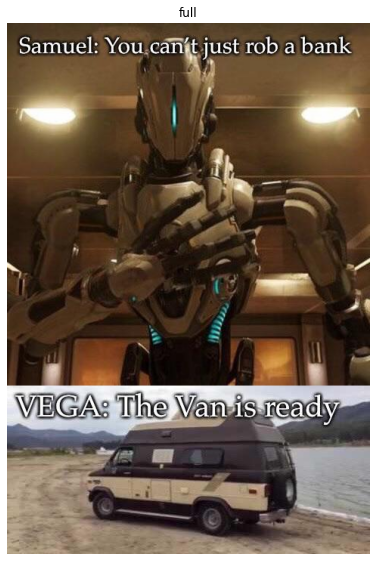

(703, 480, 3)


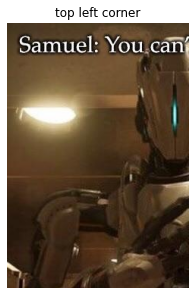

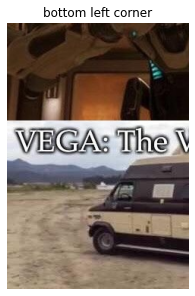

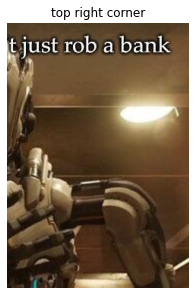

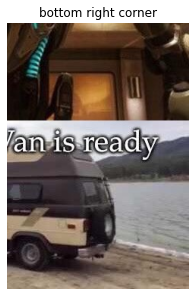

In [66]:
#Testing if it worked:

path_to_image_test = os.path.join("..","data","doomcrossing","0al47gmk8xs41.jpg") #Loading full test-image.
image = cv2.imread(str(path_to_image_test))
jimshow(image, "full") #Print image.

#Loading and printing quadrants of test-image.
path_to_image_test = os.path.join("..","data","doomcrossing","0al47gmk8xs41_corner_top_left_mod.jpg")
image = cv2.imread(str(path_to_image_test))
jimshow(image, "top left corner")

path_to_image_test = os.path.join("..","data","doomcrossing","0al47gmk8xs41_corner_bot_left_mod.jpg")
image = cv2.imread(str(path_to_image_test))
jimshow(image, "bottom left corner")

path_to_image_test = os.path.join("..","data","doomcrossing","0al47gmk8xs41_corner_top_right_mod.jpg")
image = cv2.imread(str(path_to_image_test))
jimshow(image, "top right corner")

path_to_image_test = os.path.join("..","data","doomcrossing","0al47gmk8xs41_corner_bot_right_mod.jpg")
image = cv2.imread(str(path_to_image_test))
jimshow(image, "bottom right corner")

#Success!

#### Create and save a file containing the filename, width, height for all of the new images.

In [73]:
filenames = [] #Define empty list for filenames.
width = [] #Define empty list for image widths.
height = [] #Define empty list for image heights.

for filename in Path(filepath).glob("*mod.jpg"): #Retrieve all files ending with "mod.jpg" (the modified images) from filepath.
    filenames.append(os.path.basename(os.path.normpath(filename))) #Append the filenames to the filenames list.
    image = cv2.imread(str(filename)) #Load the file as an image.
    width.append(image.shape[1]) #Append the width to the filenames list.
    height.append(image.shape[0]) #Append the height to the filenames list.
    
    #... repeat for all files...

In [74]:
#Write .csv-file.

d = [filenames, width, height] #Define columns.
export_data = zip_longest(*d, fillvalue = '') #Make an iterator that aggregates elements from each of the iterables. Iteration continues until the longest iterable is exhausted.
with open('images.csv', 'w', newline='') as myfile: #Create an empty .csv to be filled with info.
      wr = csv.writer(myfile) #Write to the file.
      wr.writerow(("filenames", "width", "height")) #Write specified columns to the csv.
      wr.writerows(export_data) 
myfile.close() #Export the file.

In [75]:
#Testing if it worked:

with open('images.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
        
#Success!

['filenames', 'width', 'height']
['0c5l0ss550p41_corner_top_left_mod.jpg', '400', '337']
['0mzs9f0wb8z41_corner_top_right_mod.jpg', '2016', '1512']
['0d95wo29cl051_corner_bot_left_mod.jpg', '640', '730']
['0czcmw8rmsz41_corner_top_left_mod.jpg', '1720', '958']
['0f348gu5nuk41_corner_bot_left_mod.jpg', '329', '330']
['0k85pi0eqd151_corner_top_left_mod.jpg', '1536', '1536']
['0gdakfpl6bh41_corner_bot_right_mod.jpg', '540', '387']
['0c5l0ss550p41_corner_top_right_mod.jpg', '400', '337']
['0iihl37qztn41_corner_bot_right_mod.jpg', '1024', '945']
['0mzs9f0wb8z41_corner_bot_left_mod.jpg', '2016', '1512']
['0q0bg5pzgus41_corner_top_right_mod.jpg', '2016', '1512']
['0lln1q0ag1r41_corner_bot_left_mod.jpg', '640', '360']
['0q0bg5pzgus41_corner_bot_right_mod.jpg', '2016', '1512']
['0iycgvopjqp41_corner_top_right_mod.jpg', '414', '896']
['0lln1q0ag1r41_corner_top_right_mod.jpg', '640', '360']
['1vumfgyx74o41_corner_bot_left_mod.jpg', '1357', '1283']
['0oinnuls0gp41_corner_bot_right_mod.jpg', '400',